In [ ]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
from numpy.random import randn

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

from sklearn.feature_selection import RFE  

from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn import metrics


import math
from sklearn import tree

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

import sklearn.datasets 

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.feature_selection import RFE   # Recursive Feature Elimination
from sklearn.svm import SVR                 # Support Vector Regression
import sklearn
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

from sklearn.feature_selection import RFE   # Recursive Feature Elimination
from sklearn.svm import SVR                 # Support Vector Regression
from sklearn.svm import SVC

In [ ]:
data = pd.read_csv("telco_join.csv")
data.head(6)

In [ ]:
data.drop(columns=['State', 'Phone'], inplace=True)


In [ ]:
X=data[['VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins', 'Intl Mins', 'CustServ Calls', 'Area Code', 'Account Length','Day Calls', 'Day Charge', 'Eve Calls', 'Eve Charge', 'Night Calls', 'Night Charge', 'Intl Calls', 'Intl Charge', 'VMail Plan' ]]
y=data[['Churn']]

In [ ]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)

from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X)

In [485]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)

# DecisionTreeClassifier

In [486]:
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(criterion = 'entropy', random_state=100, max_depth=3, min_samples_leaf= 5)

dtree_model.fit(X_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [487]:
y_pred = dtree_model.predict(X_test)


In [488]:
print("Testing Accuracy :", dtree_model.score(X_test, y_test))
print("Training Accuracy :", dtree_model.score(X_train,y_train))


('Testing Accuracy :', 0.9100449775112444)
('Training Accuracy :', 0.9036009002250562)


# confusion_matrix

In [489]:
from sklearn.metrics import confusion_matrix


In [490]:
Y_pred = dtree_model.predict(X_test)
Y_pred = [ 1 if y>=0.5 else 0 for y in Y_pred]

In [491]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)
print(cm)

[[572   6]
 [ 54  35]]


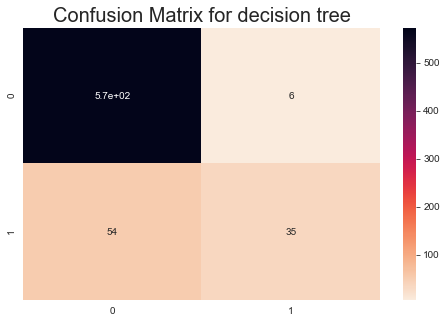

In [492]:
# plottinhg the confusion matrix

plt.rcParams['figure.figsize'] = (8, 5)
sns.heatmap(cm, annot = True, cmap = 'rocket_r')
plt.title('Confusion Matrix for decision tree', fontweight = 30, fontsize = 20)
plt.show()

# decision tree classification report

In [493]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       578
           1       0.85      0.39      0.54        89

   micro avg       0.91      0.91      0.91       667
   macro avg       0.88      0.69      0.74       667
weighted avg       0.91      0.91      0.90       667



#  Optimal Probability Thresholds with ROC Curve 


In [494]:
dt_y_prob = dtree_model.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(dt_y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
dtree_model.score(X_test, y_pred)

1.0

In [495]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, dt_y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8039345282065238

Text(0.5,0,'False Positive Rate')

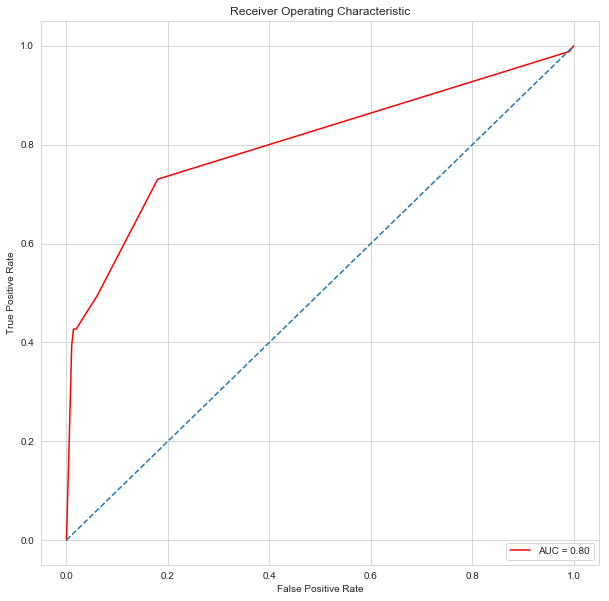

In [496]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# LogisticRegression model

In [497]:
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [498]:
y_pred = log_model.predict(X_test)


In [499]:
print("Testing Accuracy :", log_model.score(X_test, y_test))
print("Training Accuracy :", log_model.score(X_train,y_train))


('Testing Accuracy :', 0.8740629685157422)
('Training Accuracy :', 0.8559639909977494)


# confusion_matrix

In [500]:
Y_pred = log_model.predict(X_test)
Y_pred = [ 1 if y>=0.5 else 0 for y in Y_pred]

In [501]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)
print(cm)

[[573   5]
 [ 79  10]]


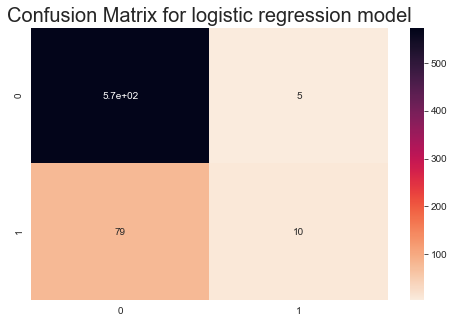

In [502]:
# plottinhg the confusion matrix

plt.rcParams['figure.figsize'] = (8, 5)
sns.heatmap(cm, annot = True, cmap = 'rocket_r')
plt.title('Confusion Matrix for logistic regression model', fontweight = 30, fontsize = 20)
plt.show()

# log model classification report

In [503]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       578
           1       0.67      0.11      0.19        89

   micro avg       0.87      0.87      0.87       667
   macro avg       0.77      0.55      0.56       667
weighted avg       0.85      0.87      0.83       667



#  Optimal Probability Thresholds with ROC Curve 


In [504]:
log_y_prob = log_model.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(log_y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
log_model.score(X_test, y_pred)

1.0

In [505]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, log_y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7671163640604952

Text(0.5,0,'False Positive Rate')

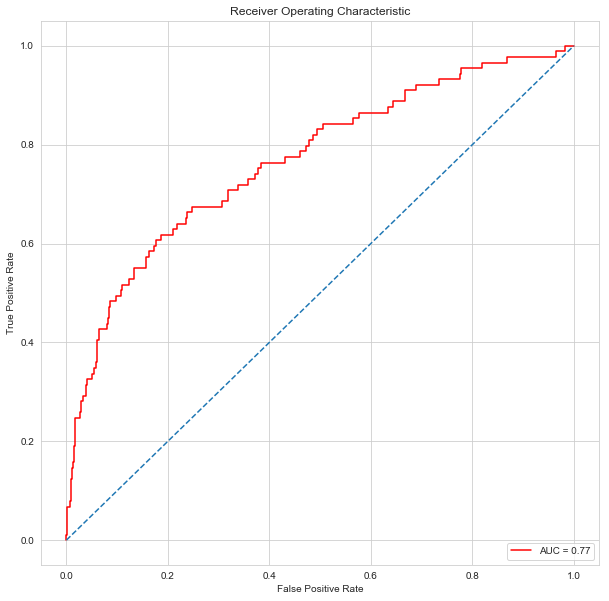

In [506]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# RandomForestClassifier model

In [507]:
r_forset_model = RandomForestClassifier()
r_forset_model.fit(X_train,y_train)

C:\Users\ericksen\Anaconda2anacon\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [508]:
y_pred = r_forset_model.predict(X_test)


In [509]:
print("Training Accuracy :", r_forset_model.score(X_train,y_train))

print("Testing Accuracy :", r_forset_model.score(X_test, y_test))


('Training Accuracy :', 0.9883720930232558)
('Testing Accuracy :', 0.9190404797601199)


# confusion_matrix


In [510]:
Y_pred = r_forset_model.predict(X_test)
Y_pred = [ 1 if y>=0.5 else 0 for y in Y_pred]

In [511]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)
print(cm)

[[566  12]
 [ 42  47]]


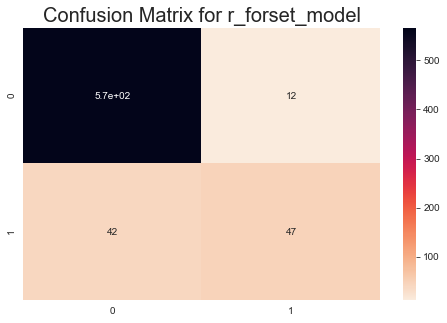

In [512]:
# plottinhg the confusion matrix

plt.rcParams['figure.figsize'] = (8, 5)
sns.heatmap(cm, annot = True, cmap = 'rocket_r')
plt.title('Confusion Matrix for r_forset_model', fontweight = 30, fontsize = 20)
plt.show()

# r_forest_model model classification report


In [513]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       578
           1       0.80      0.53      0.64        89

   micro avg       0.92      0.92      0.92       667
   macro avg       0.86      0.75      0.79       667
weighted avg       0.91      0.92      0.91       667



#  Optimal Probability Thresholds with ROC Curve 


In [514]:
forest_y_prob = r_forset_model.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(forest_y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
r_forset_model.score(X_test, y_pred)

1.0

In [515]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, forest_y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8665778935500175

Text(0.5,0,'False Positive Rate')

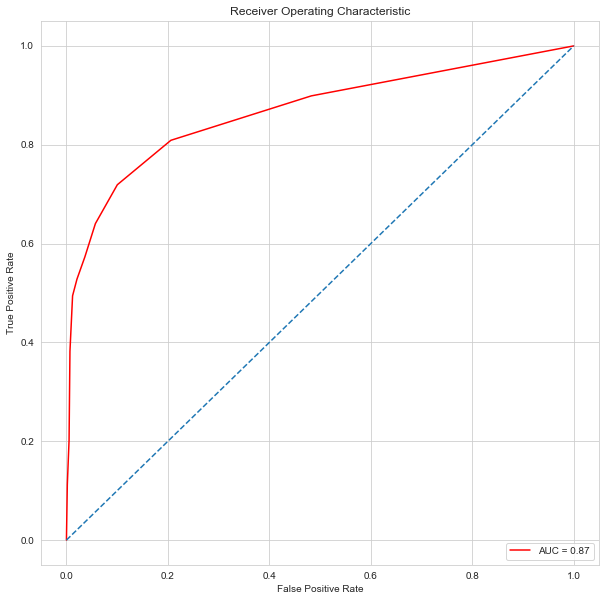

In [516]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# naive_bayes_model

In [517]:
naive_bayes_model = GaussianNB()


naive_bayes_model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [518]:
y_pred = naive_bayes_model.predict(X_test)


In [519]:
print("Training Accuracy :", naive_bayes_model.score(X_train,y_train))

print("Testing Accuracy :", naive_bayes_model.score(X_test, y_test))

('Training Accuracy :', 0.8825956489122281)
('Testing Accuracy :', 0.8950524737631185)


# confusion_matrix


In [520]:
Y_pred = naive_bayes_model.predict(X_test)
Y_pred = [ 1 if y>=0.5 else 0 for y in Y_pred]

In [521]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)
print(cm)

[[558  20]
 [ 50  39]]


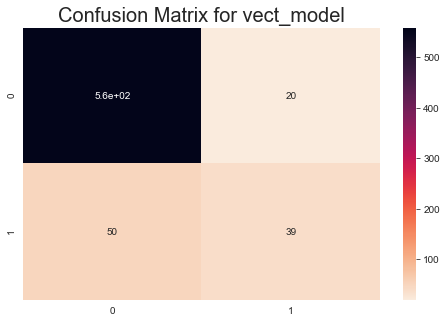

In [522]:
# plottinhg the confusion matrix

plt.rcParams['figure.figsize'] = (8, 5)
sns.heatmap(cm, annot = True, cmap = 'rocket_r')
plt.title('Confusion Matrix for vect_model', fontweight = 30, fontsize = 20)
plt.show()

# naive_bayes_model classification report


In [523]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       578
           1       0.66      0.44      0.53        89

   micro avg       0.90      0.90      0.90       667
   macro avg       0.79      0.70      0.73       667
weighted avg       0.88      0.90      0.89       667



#  Optimal Probability Thresholds with ROC Curve 


In [524]:


naive_y_prob = naive_bayes_model.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(naive_y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
naive_bayes_model.score(X_test, y_pred)

1.0

In [525]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, naive_y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7921542708292835

Text(0.5,0,'False Positive Rate')

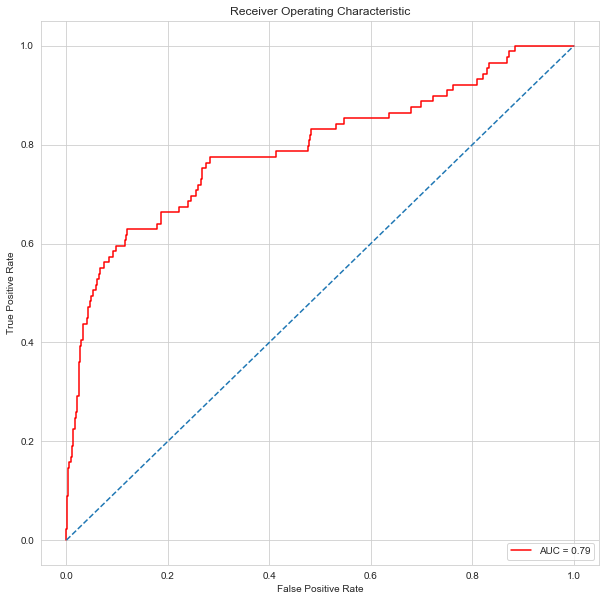

In [526]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# KNeighborsClassifier

In [527]:
knn_model = KNeighborsClassifier(n_neighbors = 6)
knn_model.fit(X_train,y_train)

C:\Users\ericksen\Anaconda2anacon\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [528]:
y_pred = knn_model.predict(X_test)


In [529]:
print("Training Accuracy :", knn_model.score(X_train,y_train))

print("Testing Accuracy :", knn_model.score(X_test, y_test))

('Training Accuracy :', 0.890847711927982)
('Testing Accuracy :', 0.8830584707646177)


# confusion_matrix


In [530]:
Y_pred =  knn_model.predict(X_test)
Y_pred = [ 1 if y>=0.5 else 0 for y in Y_pred]

In [531]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)
print(cm)

[[578   0]
 [ 78  11]]


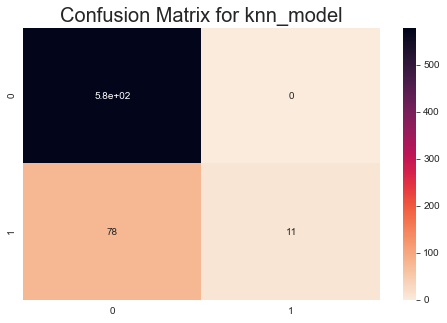

In [532]:
# plottinhg the confusion matrix

plt.rcParams['figure.figsize'] = (8, 5)
sns.heatmap(cm, annot = True, cmap = 'rocket_r')
plt.title('Confusion Matrix for knn_model', fontweight = 30, fontsize = 20)
plt.show()

# naive_bayes_model classification report


In [533]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       578
           1       1.00      0.12      0.22        89

   micro avg       0.88      0.88      0.88       667
   macro avg       0.94      0.56      0.58       667
weighted avg       0.90      0.88      0.84       667



#  Optimal Probability Thresholds with ROC Curve 


In [534]:

knn_y_prob = knn_model.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(knn_y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
knn_model.score(X_test, y_pred)

1.0

In [535]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8867656778507834

Text(0.5,0,'False Positive Rate')

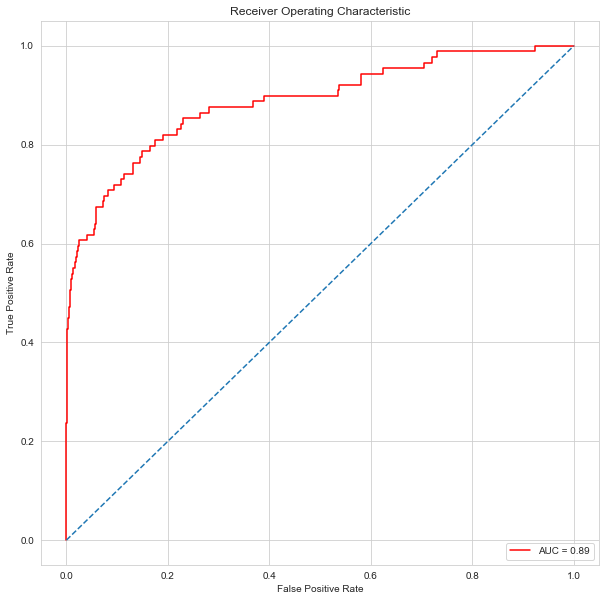

In [536]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# MLPClassifier model

#A multilayer perceptron (MLP) is a class of feedforward artificial neural network (ANN). ... MLP utilizes a supervised learning technique called backpropagation for training. Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. It can distinguish data that is not linearly separable.


In [537]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()


In [538]:
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [539]:
y_pred = mlp.predict(X_test)


In [540]:
print("Training Accuracy :", mlp.score(X_train,y_train))

print("Testing Accuracy :", mlp.score(X_test, y_test))

('Training Accuracy :', 0.9441110277569392)
('Testing Accuracy :', 0.9325337331334332)


# confusion_matrix


In [541]:
Y_pred =  mlp.predict(X_test)
Y_pred = [ 1 if y>=0.5 else 0 for y in Y_pred]

In [542]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)
print(cm)

[[570   8]
 [ 37  52]]


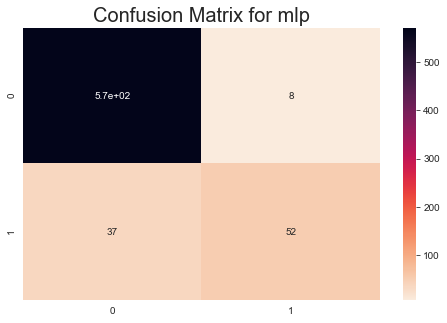

In [543]:
# plottinhg the confusion matrix

plt.rcParams['figure.figsize'] = (8, 5)
sns.heatmap(cm, annot = True, cmap = 'rocket_r')
plt.title('Confusion Matrix for mlp', fontweight = 30, fontsize = 20)
plt.show()

# mlp classification report


In [544]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       578
           1       0.87      0.58      0.70        89

   micro avg       0.93      0.93      0.93       667
   macro avg       0.90      0.79      0.83       667
weighted avg       0.93      0.93      0.93       667



#  Optimal Probability Thresholds with ROC Curve 


In [545]:

mlp_y_prob = mlp.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(mlp_y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
mlp.score(X_test, y_pred)

1.0

In [546]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, mlp_y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8754325259515571

Text(0.5,0,'False Positive Rate')

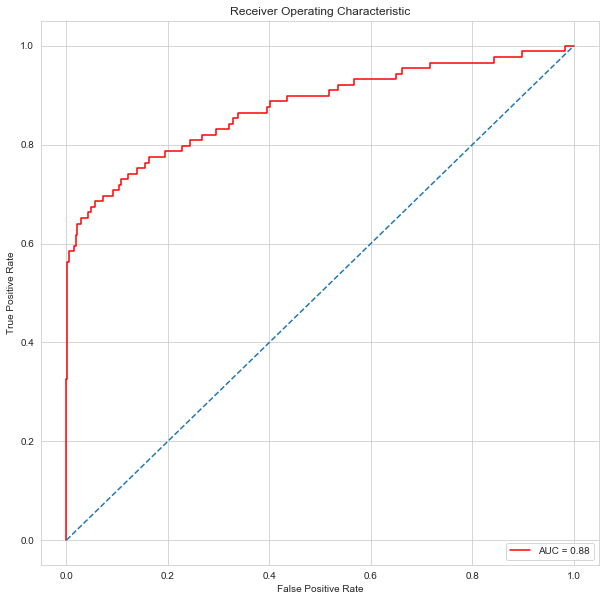

In [547]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# all predicted model score

In [548]:


print("dtree_model :", dtree_model.score(X_train,y_train))
print("log_model :", log_model.score(X_train,y_train))

print("r_forset_model :", r_forset_model.score(X_train,y_train))

print("naive_bayes_model :", naive_bayes_model.score(X_train,y_train))

print("knn_model :", knn_model.score(X_train,y_train))

print("mlp model:", mlp.score(X_train,y_train))




('dtree_model :', 0.9036009002250562)
('log_model :', 0.8559639909977494)
('r_forset_model :', 0.9883720930232558)
('naive_bayes_model :', 0.8825956489122281)
('knn_model :', 0.890847711927982)
('mlp model:', 0.9441110277569392)


# Computing ROC curve values

In [549]:
from sklearn.metrics import roc_curve, roc_auc_score

In [550]:
dtree_model = roc_auc_score(y_test, dt_y_prob)
log_model  = roc_auc_score(y_test, log_y_prob)
r_forset_model  = roc_auc_score(y_test, forest_y_prob)
naive_bayes_model  = roc_auc_score(y_test, naive_y_prob)
knn_model  = roc_auc_score(y_test, knn_y_prob)
mlp_model= roc_auc_score(y_test, mlp_y_prob)



In [551]:
print('dtree_model: ROC = %.3f' % (dtree_model))
print('log_model: ROC = %.3f' % (log_model))
print('r_forset_model: ROC = %.3f' % (r_forset_model))
print('naive_bayes_model: ROC = %.3f' % (naive_bayes_model))
print('knn_model: ROC = %.3f' % (knn_model))
print('mlp_model: ROC = %.3f' % (mlp_model))

dtree_model: ROC = 0.804
log_model: ROC = 0.767
r_forset_model: ROC = 0.867
naive_bayes_model: ROC = 0.792
knn_model: ROC = 0.775
mlp_model: ROC = 0.875


# Calculate ROC curve

In [552]:
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_y_prob)
log_fpr, log_tpr, _ = roc_curve(y_test, log_y_prob)
forest_fpr, forest_tpr, _ = roc_curve(y_test, forest_y_prob)
naive_fpr, naive_tpr, _ = roc_curve(y_test, naive_y_prob)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_y_prob)
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, mlp_y_prob)

# Plot the ROC curve

Text(0.5,0,'False Positive Rate')

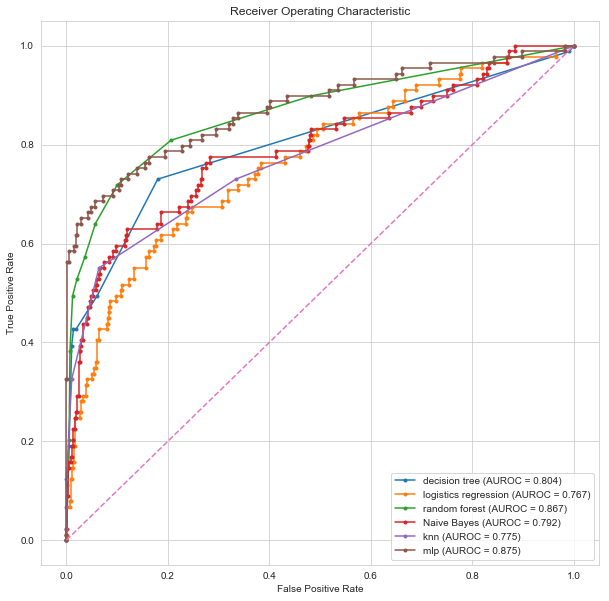

In [553]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')


plt.plot(dt_fpr, dt_tpr,   marker='.', label='decision tree (AUROC = %0.3f)' % dtree_model)
plt.plot(log_fpr, log_tpr, marker='.', label='logistics regression (AUROC = %0.3f)' % log_model)
plt.plot(forest_fpr, forest_tpr, marker='.', label='random forest (AUROC = %0.3f)' % r_forset_model)
plt.plot(naive_fpr, naive_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % naive_bayes_model)
plt.plot(knn_fpr, knn_tpr, marker='.', label='knn (AUROC = %0.3f)' % knn_model)
plt.plot(mlp_fpr, mlp_tpr, marker='.', label='mlp (AUROC = %0.3f)' % mlp_model)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [554]:
df= y_pred

In [555]:
df

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [556]:
df.to_csv('dff.tsv', sep='\t')

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'

In [557]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:



df = pd.read_csv("df.csv")
df.head(6)


In [ ]:
df['df'].value_counts()

In [ ]:
609+58

In [559]:


train= X_train
train

array([[-0.59175986,  1.13708763, -1.28545033, ..., -0.60119509,
         1.02887115, -0.61839626],
       [ 2.76926251, -0.21070992,  1.37891623, ..., -1.00755957,
        -1.26659509,  1.6170861 ],
       [-0.59175986, -0.87542751, -1.22431387, ..., -1.41392404,
        -0.40413668, -0.61839626],
       ...,
       [-0.59175986, -0.50634399, -1.25784032, ..., -0.60119509,
        -0.15203345, -0.61839626],
       [-0.59175986,  0.72393443, -1.01723875, ...,  0.21153386,
        -1.47889255, -0.61839626],
       [-0.59175986, -0.51736141,  0.36326206, ...,  0.21153386,
        -2.23520223, -0.61839626]])

In [560]:
y_train

,Churn
2077,0
2608,0
1322,1
1645,0
656,0
681,0
3111,0
2425,0
338,0
1848,0


In [561]:
X_test

array([[ 1.16181703, -1.99369551, -0.38220837, ..., -1.41392404,
         0.9492596 ,  1.6170861 ],
       [-0.59175986, -0.17031272, -1.63254768, ...,  1.02426282,
         0.33890442, -0.61839626],
       [-0.59175986,  0.40626552, -0.91271511, ..., -1.00755957,
        -0.44394245, -0.61839626],
       ...,
       [-0.59175986,  0.51276724, -0.71352857, ..., -0.60119509,
        -0.84200018, -0.61839626],
       [ 1.96553977, -1.27205458,  0.14435408, ..., -1.00755957,
         1.30751156,  1.6170861 ],
       [-0.59175986,  0.71842572,  0.13843765, ..., -0.19483061,
         0.31236723, -0.61839626]])

In [562]:
y_test

,Churn
2540,0
376,0
3043,0
2118,1
2003,0
2159,0
1595,0
409,0
1473,0
2344,0


In [564]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.161817,-1.993696,-0.382208,-0.276311,0.953889,-0.427932,-0.523603,-0.277898,-0.918747,-1.994191,0.144867,-0.381330,0.556704,-0.276562,-1.413924,0.949260,1.617086
1,-0.591760,-0.170313,-1.632548,-0.256535,0.344880,0.332354,-0.523603,0.927644,-0.669570,-0.169831,0.797489,-1.631904,0.556704,-0.254589,1.024263,0.338904,-0.618396
2,-0.591760,0.406266,-0.912715,-0.721272,-0.443249,-0.427932,-0.688834,1.882031,0.028125,0.405884,-1.110176,-0.912650,-1.078813,-0.720414,-1.007560,-0.443942,-0.618396
3,-0.591760,-0.126243,-0.354598,0.504842,-0.156656,-1.188218,1.718817,-1.609016,0.925161,-0.126626,-0.708563,-0.353488,-0.005505,0.505673,-1.413924,-0.152033,-0.618396
4,-0.591760,0.198771,-0.774665,-0.216983,0.989713,-0.427932,-0.523603,-1.709478,-0.021710,0.198497,0.195068,-0.775760,1.834452,-0.215038,0.617898,0.989065,-0.618396
5,-0.591760,0.189590,-0.370376,1.560882,0.989713,-0.427932,-0.523603,0.776951,0.227466,0.189856,0.797489,-0.369729,0.250045,1.560372,-1.007560,0.989065,-0.618396
6,-0.591760,-0.017905,-0.652392,-0.434520,-0.586545,1.092641,-0.523603,-0.453706,0.077960,-0.017531,-0.808966,-0.652790,-1.794352,-0.434767,-0.194831,-0.589897,-0.618396
7,-0.591760,0.149192,-0.078498,-0.669855,-1.947859,0.332354,-0.523603,1.103452,0.476643,0.148810,0.847691,-0.077387,0.403374,-0.667679,-0.194831,-1.943293,-0.618396
8,-0.591760,1.585129,-0.374320,0.111299,0.022464,-0.427932,-0.523603,-0.378359,0.974997,1.585399,-0.407352,-0.374369,0.147825,0.110161,-0.194831,0.020458,-0.618396
9,-0.591760,0.066562,1.584019,-1.892013,-0.729841,-0.427932,-0.523603,-0.152320,-0.121381,0.066720,-0.256747,1.583858,0.658924,-1.893766,1.430627,-0.735851,-0.618396


In [565]:
 
df = pd.DataFrame(X_test)

In [566]:
print(df)

           0         1         2         3         4         5         6   \
0    1.161817 -1.993696 -0.382208 -0.276311  0.953889 -0.427932 -0.523603   
1   -0.591760 -0.170313 -1.632548 -0.256535  0.344880  0.332354 -0.523603   
2   -0.591760  0.406266 -0.912715 -0.721272 -0.443249 -0.427932 -0.688834   
3   -0.591760 -0.126243 -0.354598  0.504842 -0.156656 -1.188218  1.718817   
4   -0.591760  0.198771 -0.774665 -0.216983  0.989713 -0.427932 -0.523603   
5   -0.591760  0.189590 -0.370376  1.560882  0.989713 -0.427932 -0.523603   
6   -0.591760 -0.017905 -0.652392 -0.434520 -0.586545  1.092641 -0.523603   
7   -0.591760  0.149192 -0.078498 -0.669855 -1.947859  0.332354 -0.523603   
8   -0.591760  1.585129 -0.374320  0.111299  0.022464 -0.427932 -0.523603   
9   -0.591760  0.066562  1.584019 -1.892013 -0.729841 -0.427932 -0.523603   
10  -0.591760 -2.131413 -0.102164  0.182492 -0.085008 -0.427932 -0.523603   
11   1.600211 -0.614682 -0.758888 -1.415411  1.527074 -1.188218 -0.688834   

In [576]:
display = pd.DataFrame( y_pred, data)
display

ValueError: Shape of passed values is (667, 1), indices imply (3333, 1)

In [569]:
y_test

,Churn
2540,0
376,0
3043,0
2118,1
2003,0
2159,0
1595,0
409,0
1473,0
2344,0


In [572]:
df =y_pred

In [574]:
df

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

,y_pred,df
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


In [583]:
df_row = pd.concat([df, data])


TypeError: cannot concatenate object of type "<type 'numpy.ndarray'>"; only pd.Series, pd.DataFrame, and pd.Panel (deprecated) objs are valid

In [584]:
df3 = pd.merge(df, data)
df3

TypeError: Can only merge Series or DataFrame objects, a <type 'numpy.ndarray'> was passed

In [586]:
df.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [588]:
df = pd.read_csv('df.csv')

In [593]:
df.rename(columns={'df': 'y_pred', 'Unnamed' : 'DENT'})

,Unnamed: 0,y_pred
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
5,5,0
6,6,0
7,7,0
8,8,0
9,9,0


In [589]:
df

,Unnamed: 0,df
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
5,5,0
6,6,0
7,7,0
8,8,0
9,9,0


In [590]:
data.head()

,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Area Code,Account Length,Churn,Int'l Plan,VMail Plan
0,25,265.1,197.4,244.7,10.0,1,110,45.07,99,16.78,91,11.01,3,2.70,415,128,0,0,1
1,26,161.6,195.5,254.4,13.7,1,123,27.47,103,16.62,103,11.45,3,3.70,415,107,0,0,1
2,0,243.4,121.2,162.6,12.2,0,114,41.38,110,10.30,104,7.32,5,3.29,415,137,0,0,0
3,0,299.4,61.9,196.9,6.6,2,71,50.90,88,5.26,89,8.86,7,1.78,408,84,0,1,0
4,0,166.7,148.3,186.9,10.1,3,113,28.34,122,12.61,121,8.41,3,2.73,415,75,0,1,0


In [591]:
df3 = pd.merge(df, data)
df3

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False